In [3]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType

getBlinded = Blinders(FitType.Omega_a, 'memes')

Welcome to JupyROOT 6.18/04


In [4]:
chain = r.TChain("farline/eventTree");
chain.Add("./9day/gm2offline_ana_233128_16528.00035.root");
chain.Add("./9day/gm2offline_ana_233130_16535.00353.root");
chain.Add("./9day/gm2offline_ana_233134_16482.00307.root");
chain.Add("./9day/gm2offline_ana_233136_16528.00161.root");

In [23]:
"""
Define the blinded wiggle function used for fitting
"""

def blinded_wiggle(x, p):
    norm = p[0]
    life = p[1]
    asym = p[2]
    R = p[3]
    phi = p[4]
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

func = r.TF1("func", blinded_wiggle, 30, 600, 5)
func.SetParNames('N', '#tau', 'A', 'R( #omega_{a} )', '#phi')
func.SetParameters(2500, 64.4, 0.4, 0, 5.2)
func.SetLineColor(3)
func.SetNpx(10000)

In [7]:
"""
Create a list of histograms of XY ranges
"""

rows = []
for i in range(0, 6):
    row = []
    for j in range(0, 9):
        hist = r.TH2D("y"+str(i)+"x"+str(j),
                      "energy vs Time with Y ["+str(i)+","+str(i+1)+"] and X ["+str(j)+","+str(j+1)+"]; Time [#mus]; Energy [MeV]",
                      4700, 0, 700, 100, 0, 6000)
        chain.Draw("energy:time*1.25/1000.>>y"+str(i)+"x"+str(j), "x>"+str(j)+" && x<"+str(j+1)+" && y>"+str(i)+" && y<"+str(i+1), "goff")
        row.append(hist.Clone("y"+str(i)+"x"+str(j)))
    rows.append(row)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


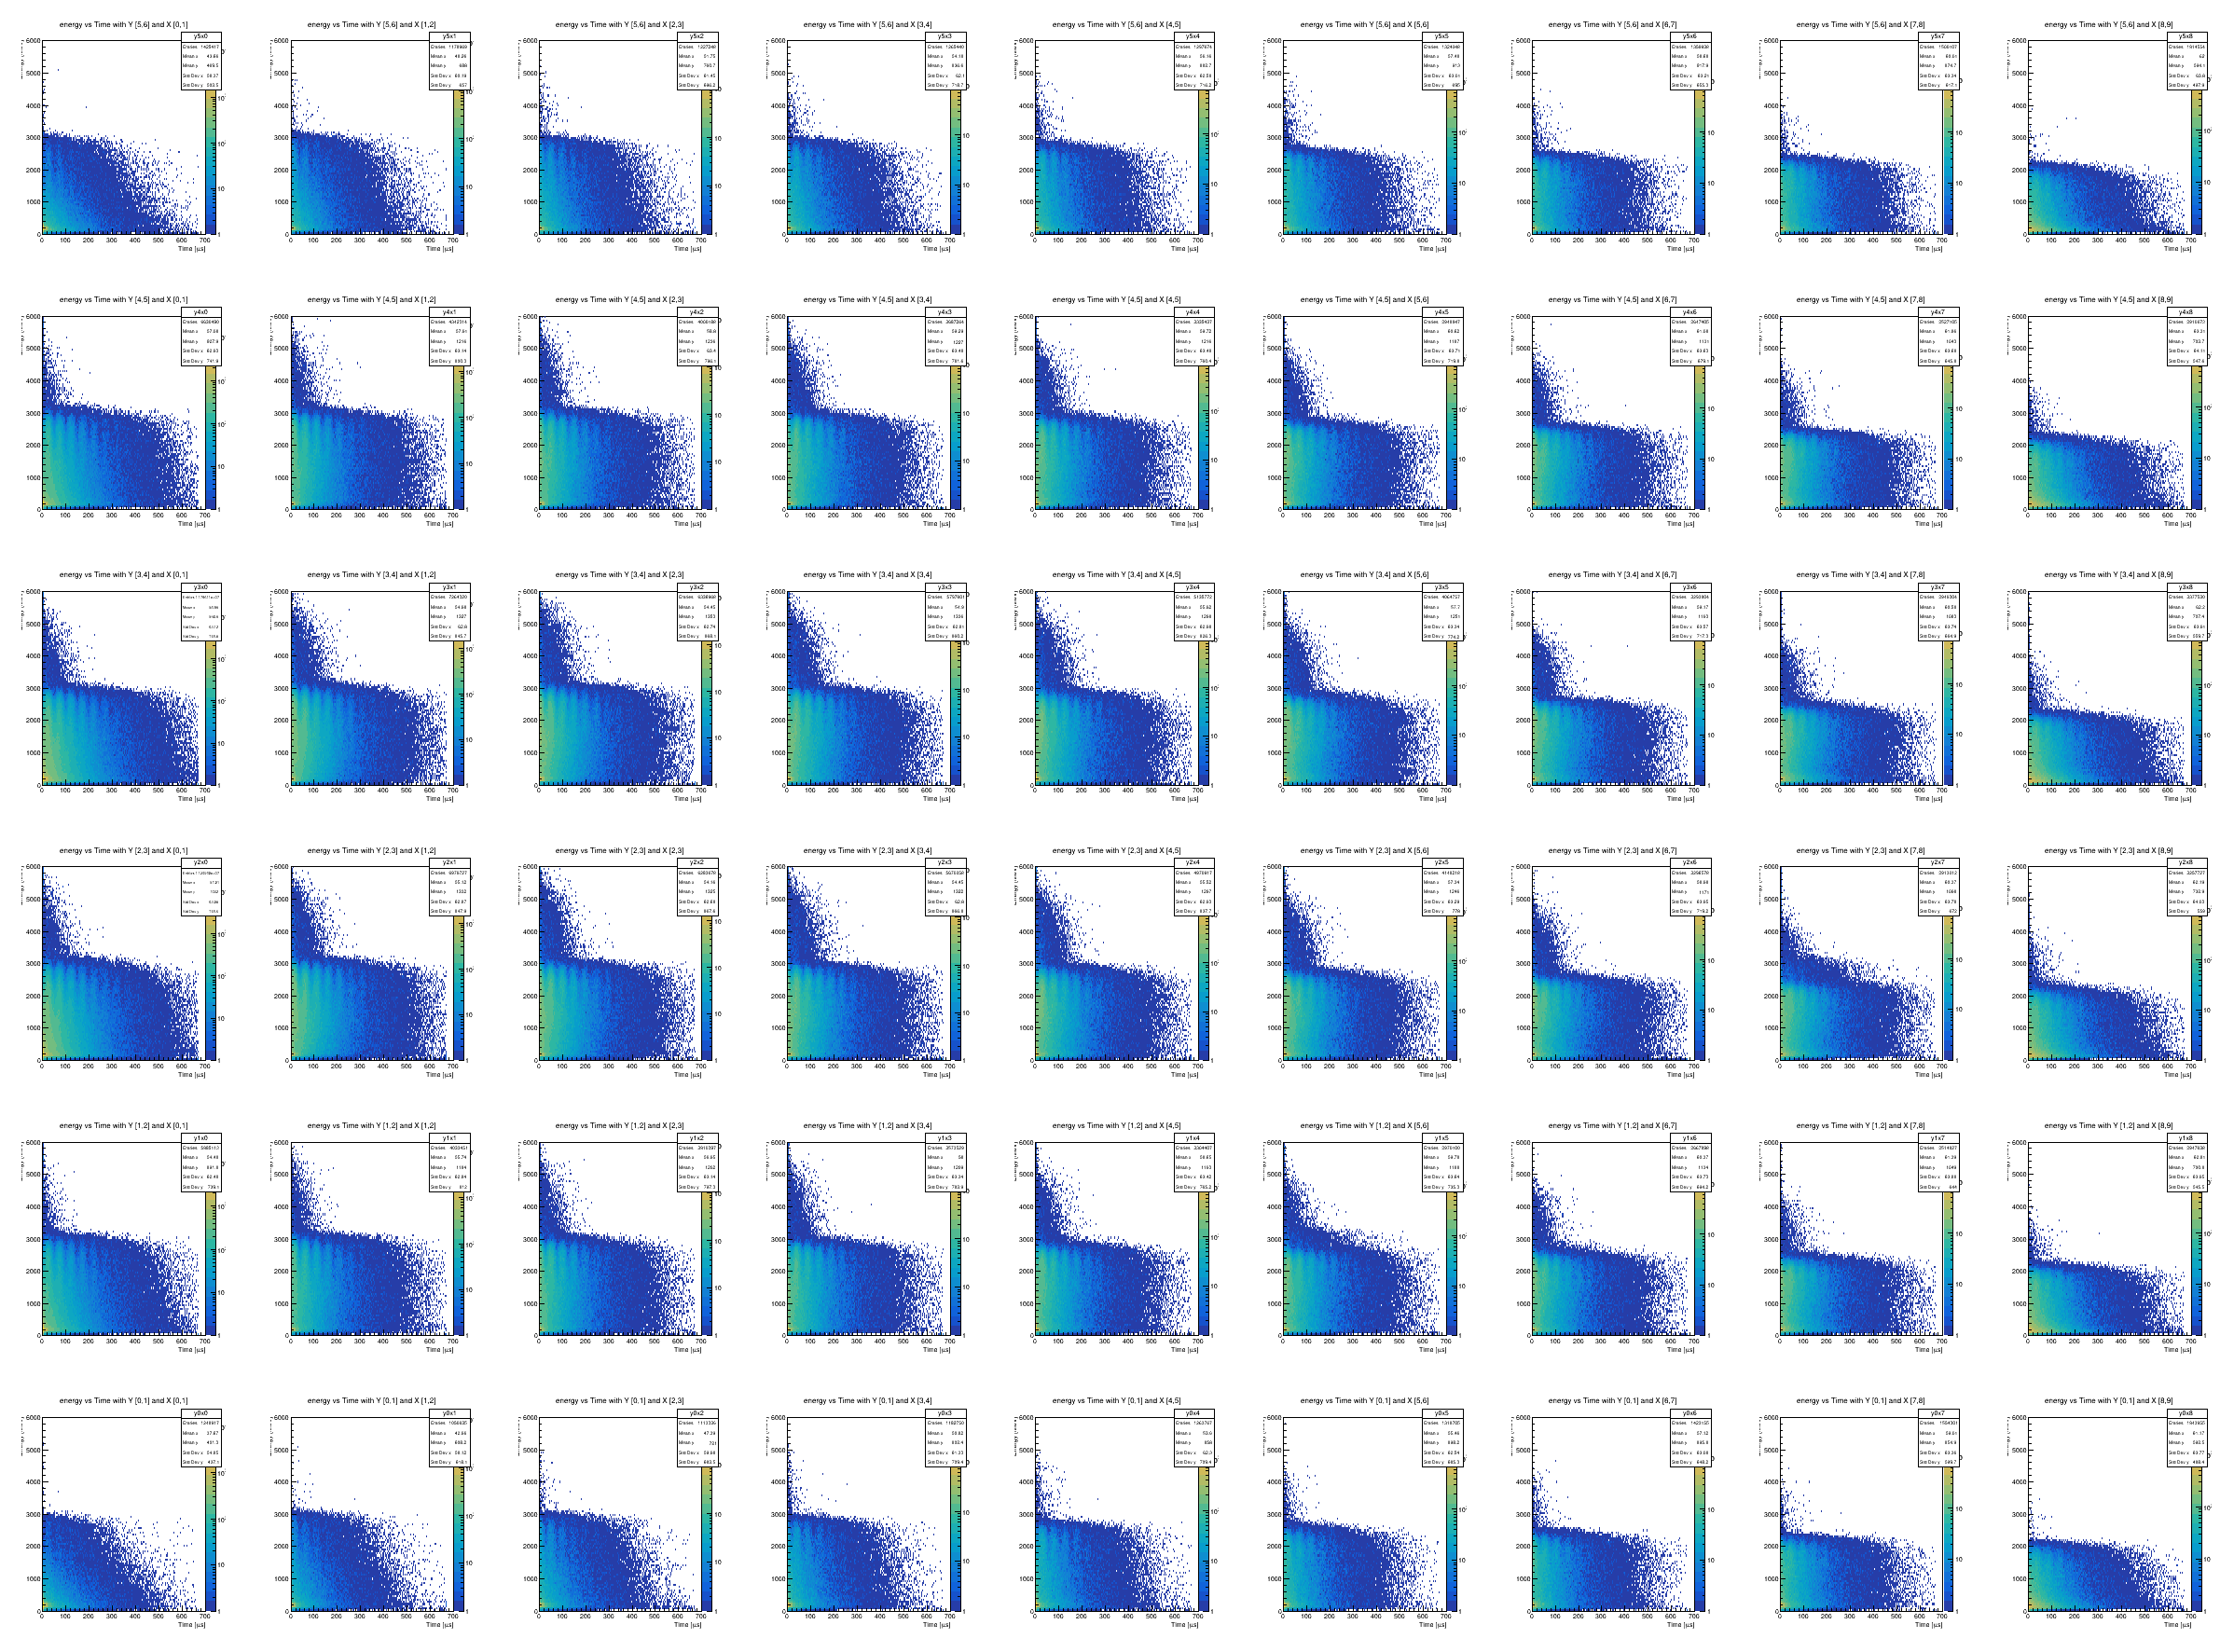

In [12]:
"""
Display the energy vs time histogram for each section
"""

c = r.TCanvas("c", "c", 2400, 1800)
c.Divide(9,6)
index = 1
for i, row in reversed(list(enumerate(rows))):
    for j, hist in enumerate(row):
        c.cd(index)
        hist.Draw("colz")
        r.gPad.SetLogz()
        index = index +1

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


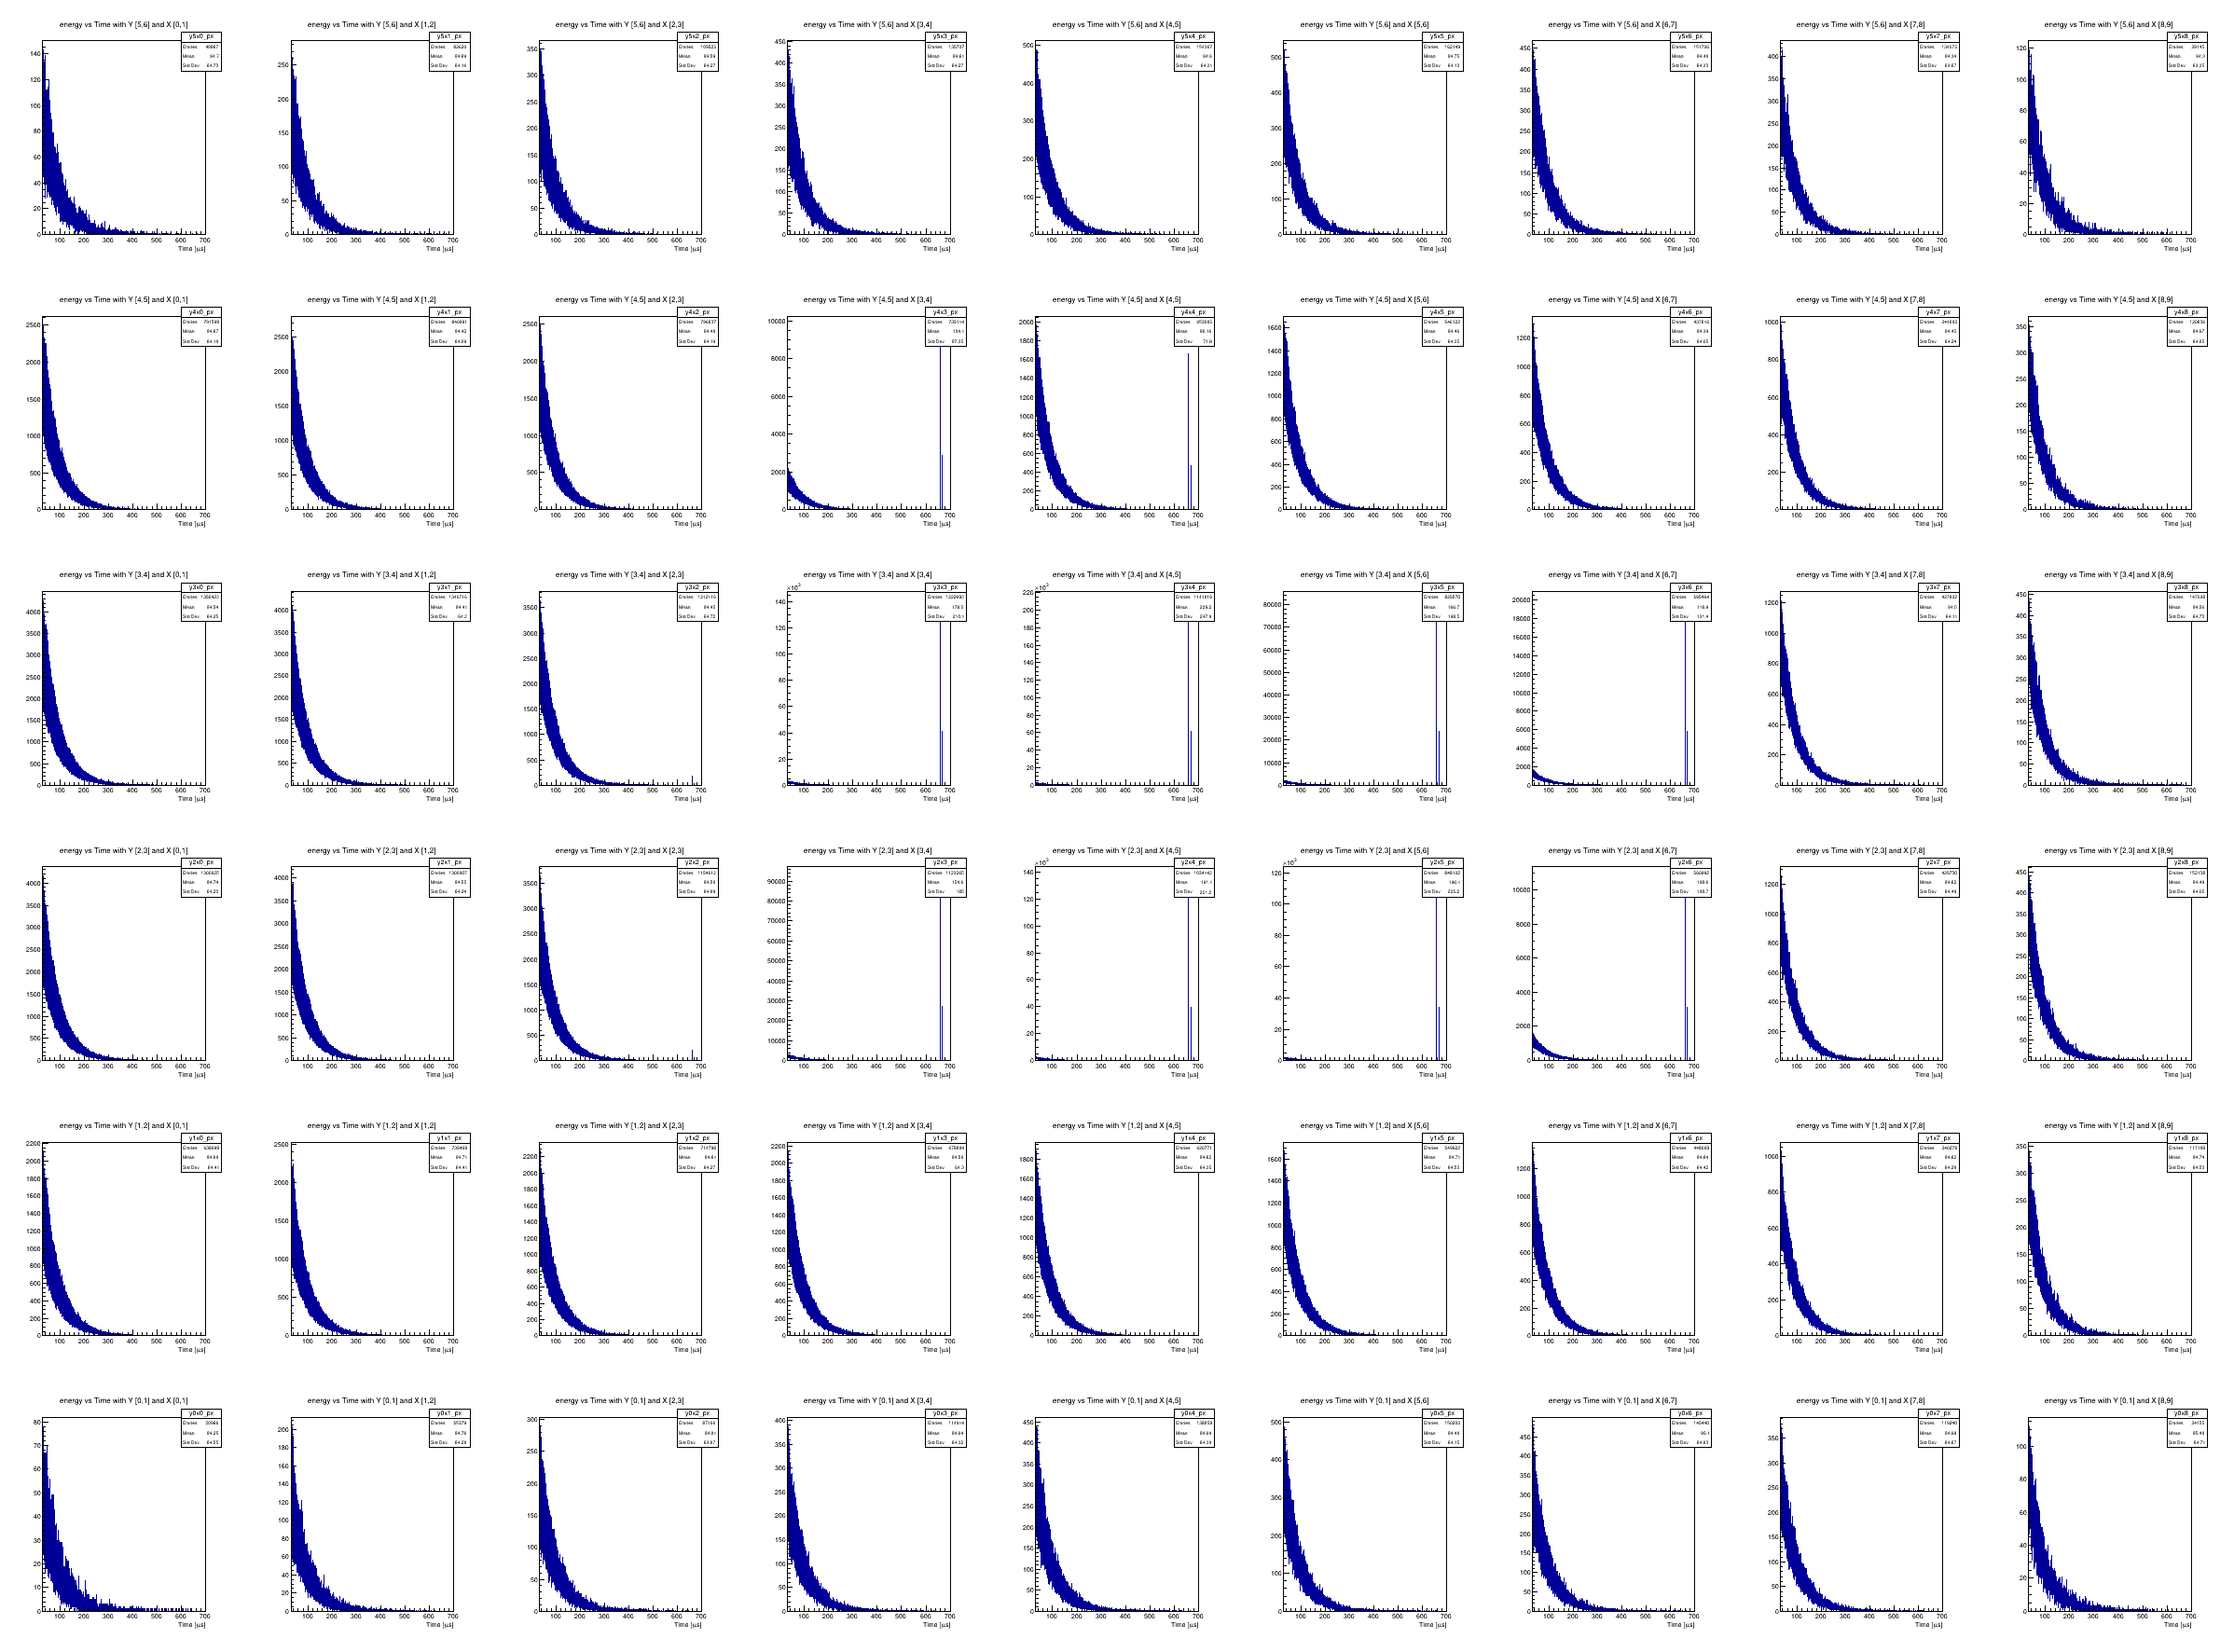

In [17]:
"""
Display a wiggle for each section

Laser Pulses in the center?
"""

eLow = 1700
eHigh = 6000

c = r.TCanvas("c", "c", 2400, 1800)
c.Divide(9,6)
index = 1
for i, row in reversed(list(enumerate(rows))):
    for j, hist in enumerate(row):
        c.cd(index)
        
        binLow = hist.GetYaxis().FindBin(eLow)
        binHigh = hist.GetYaxis().FindBin(eHigh)
        
        hist.GetXaxis().SetRangeUser(30,700)
        hist.ProjectionX("_px", binLow, binHigh).Draw("colz")
        
        index = index +1

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


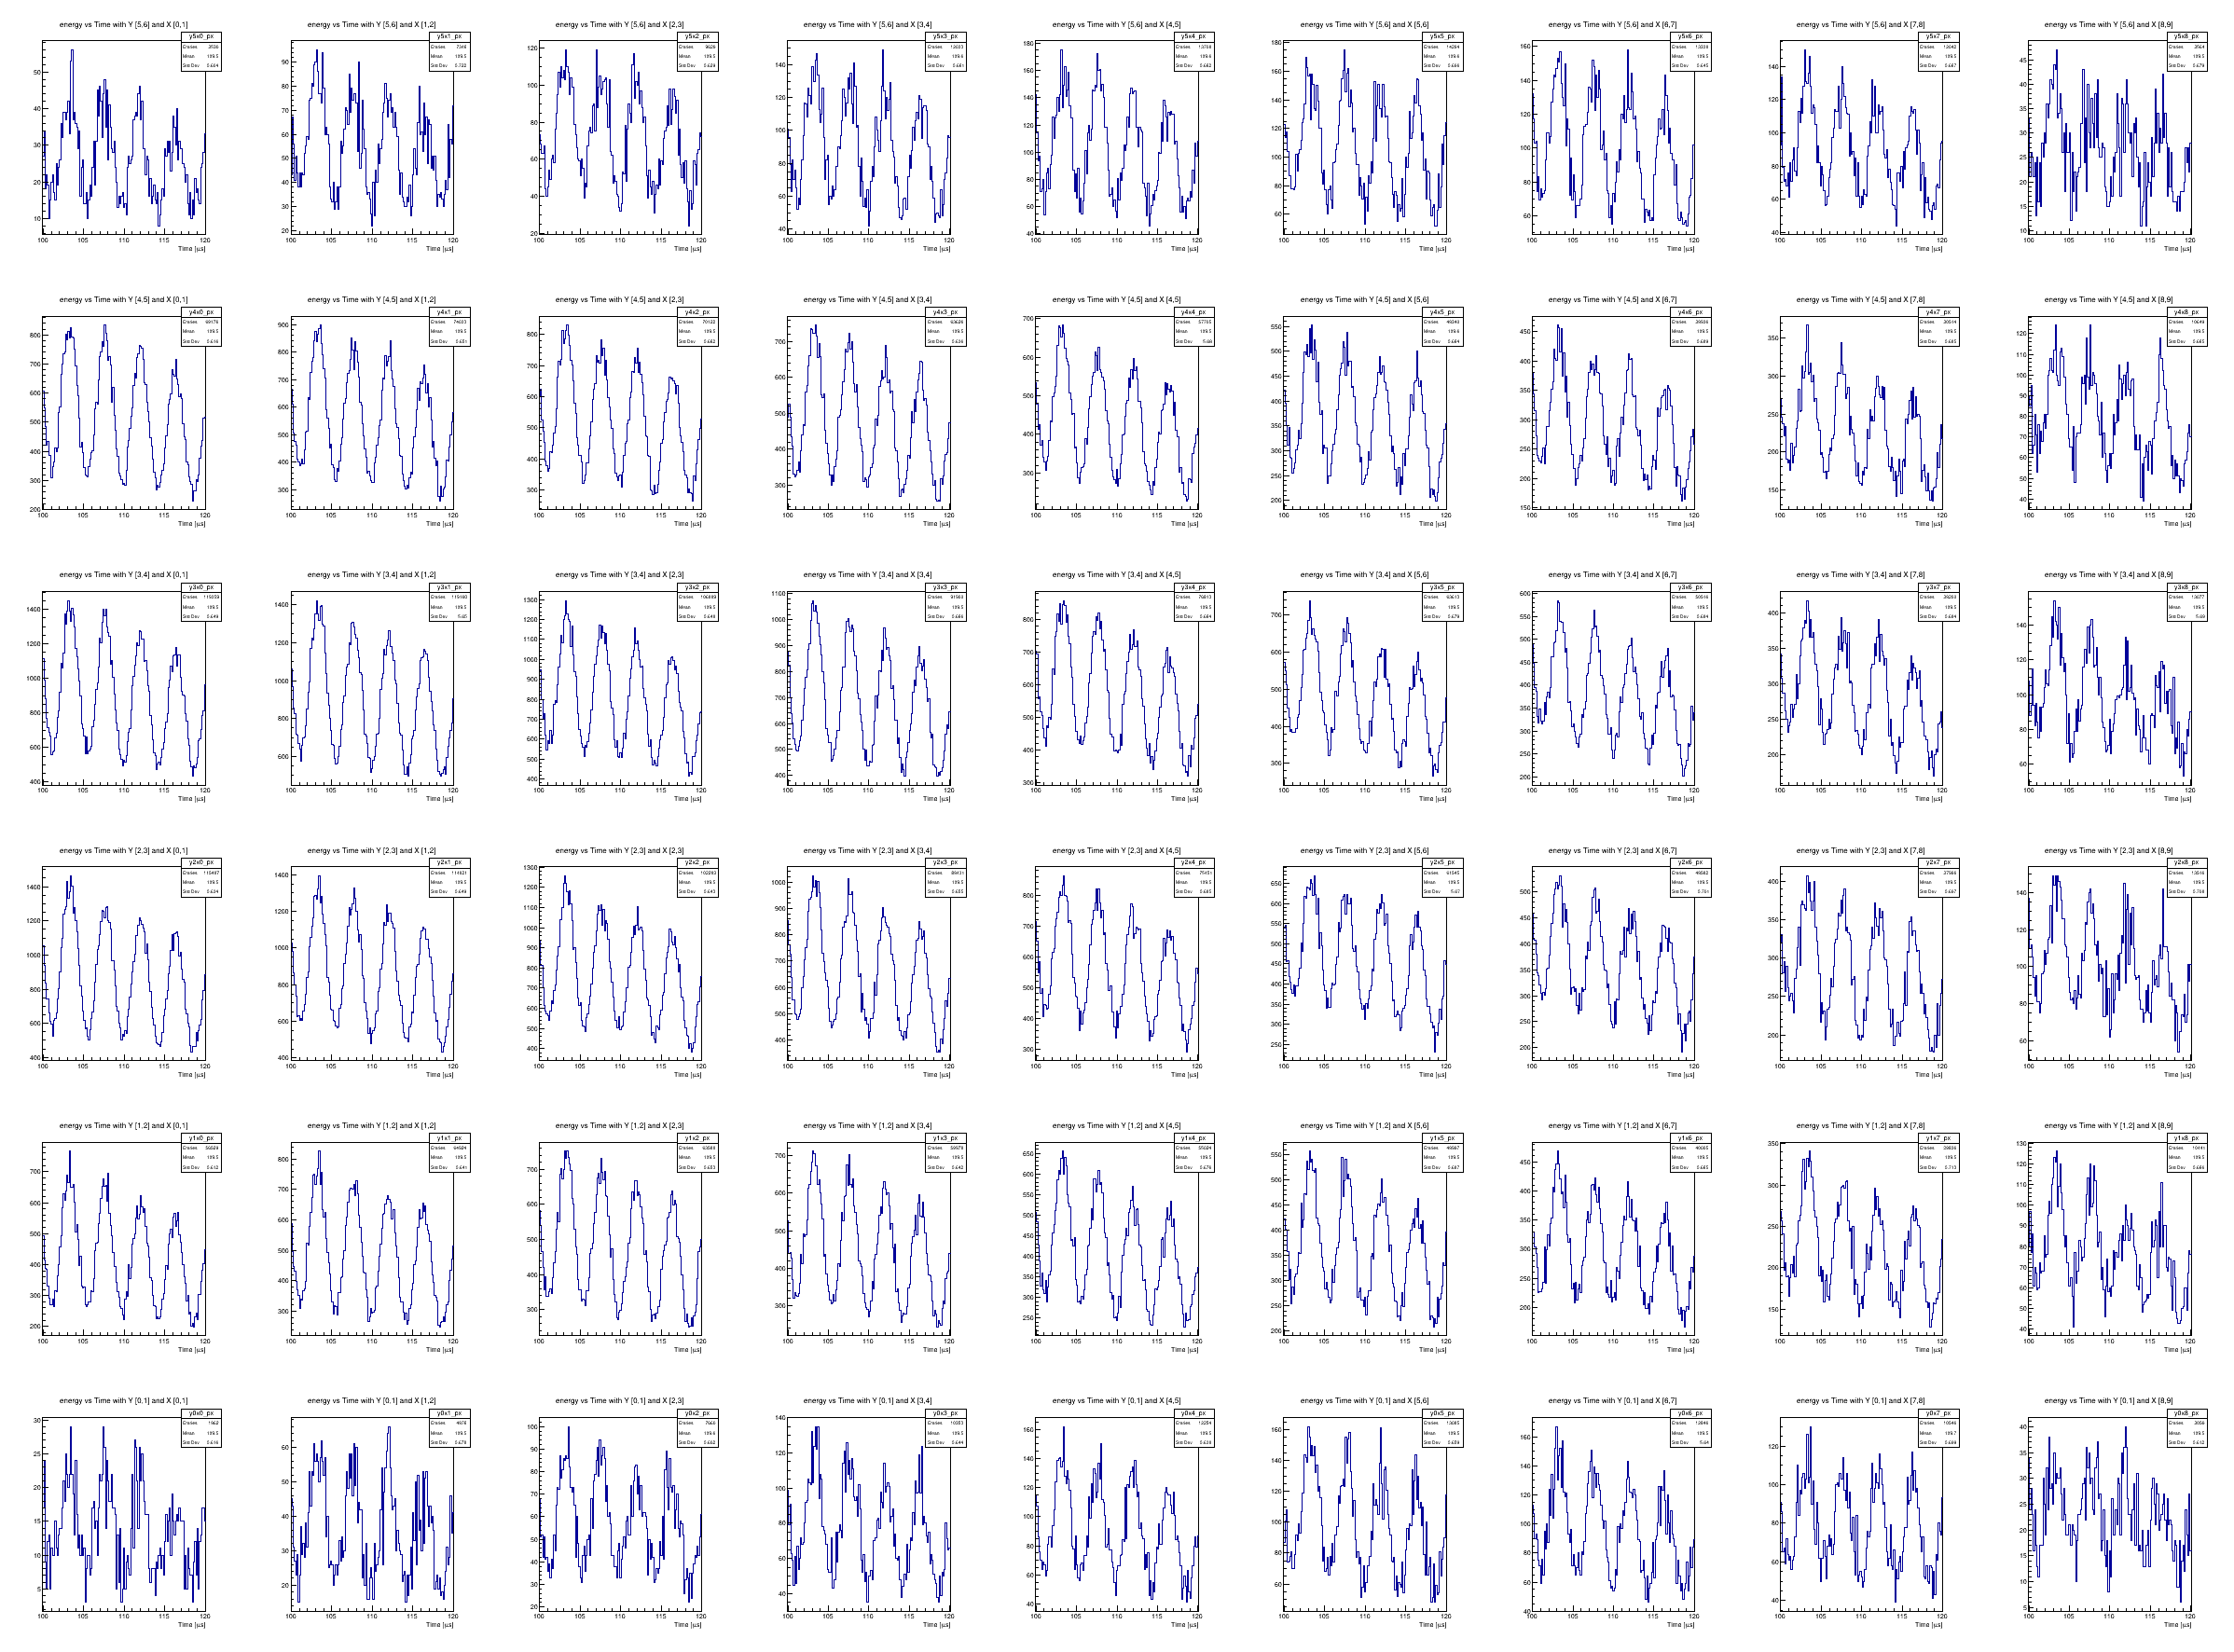

In [29]:
"""
Display a wiggle for each section

When doing time range of [30, 80] there was a lot of distortion in the ~
on the corners, when [80, 100] there is a bit more of a structure resembling
the y:x pattern of hits on a calorimeter. So the distortion I am seeing is
a result of having fewer hits at these locations?
"""

eLow = 1700
eHigh = 6000

c = r.TCanvas("c", "c", 2400, 1800)
c.Divide(9,6)
index = 1
for i, row in reversed(list(enumerate(rows))):
    for j, hist in enumerate(row):
        c.cd(index)
        
        binLow = hist.GetYaxis().FindBin(eLow)
        binHigh = hist.GetYaxis().FindBin(eHigh)
        
        hist.GetXaxis().SetRangeUser(100, 120)
        hist.ProjectionX("_px", binLow, binHigh).Draw("colz")
        
        index = index +1

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


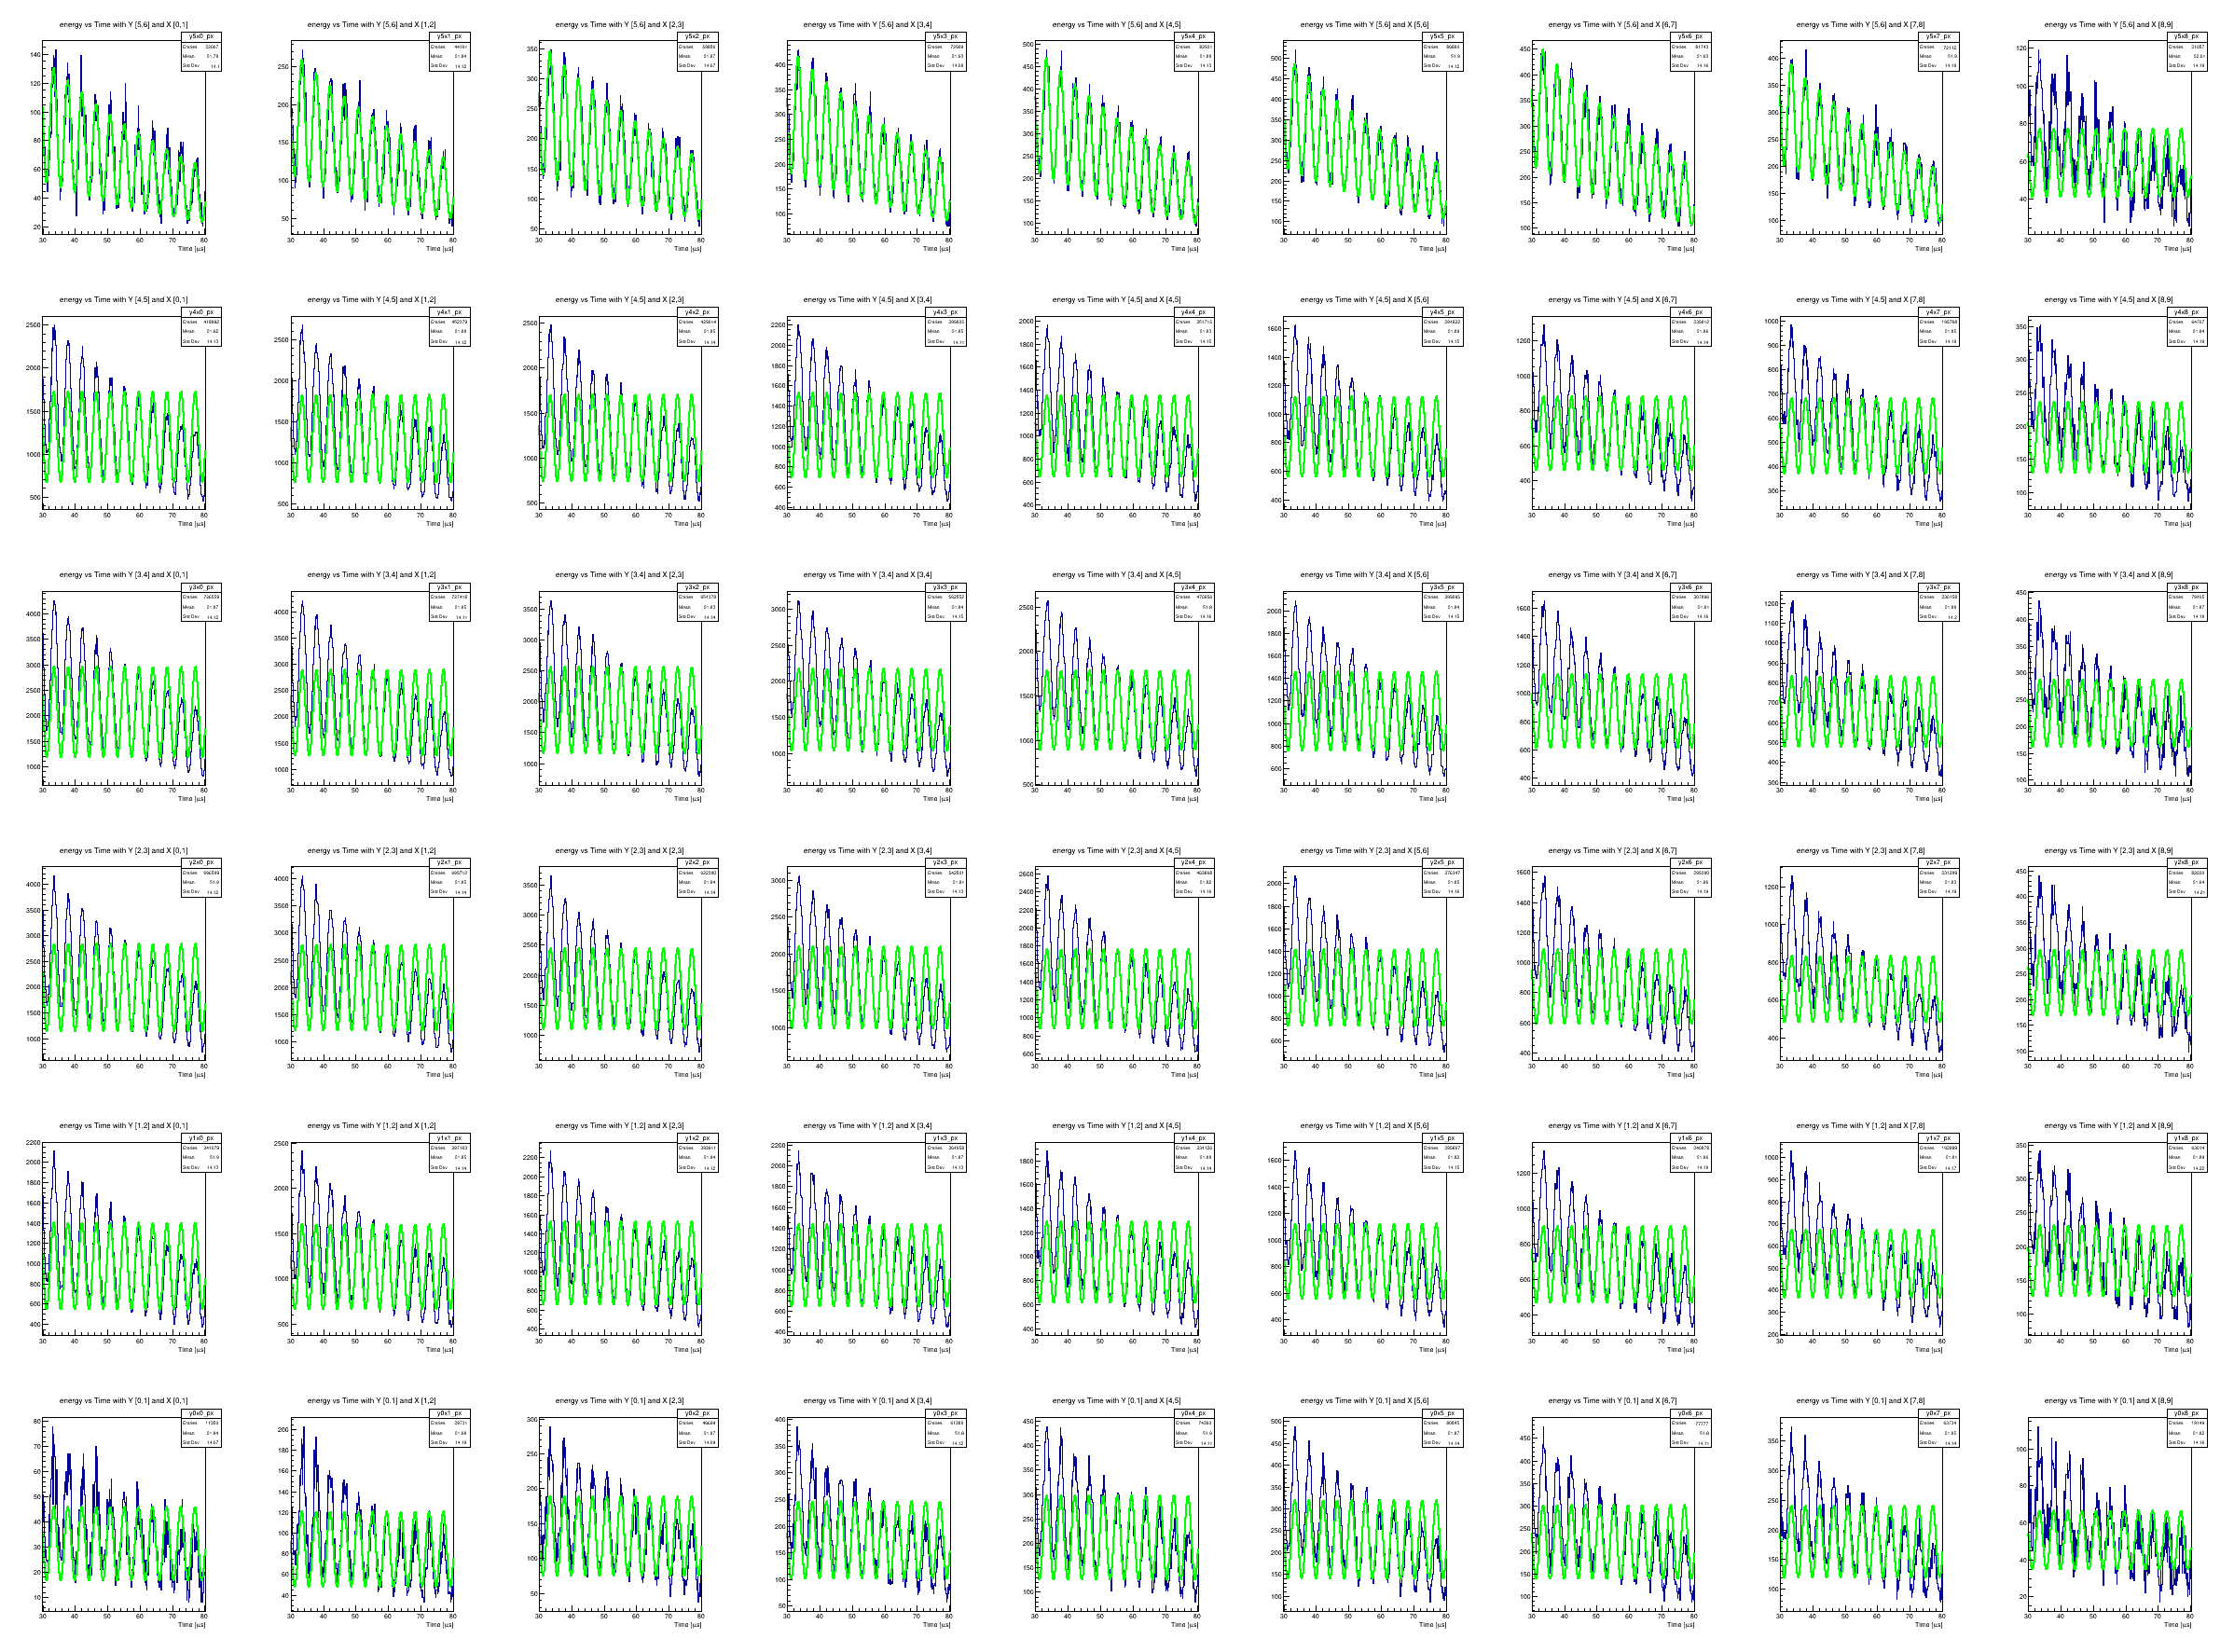

In [24]:
"""
Plot the fit for each one
"""

eLow = 1700
eHigh = 6000

c = r.TCanvas("c", "c", 2400, 1800)
c.Divide(9,6)
index = 1
for i, row in reversed(list(enumerate(rows))):
    for j, hist in enumerate(row):
        c.cd(index)
    
        binLow = hist.GetYaxis().FindBin(eLow)
        binHigh = hist.GetYaxis().FindBin(eHigh)

        hist.GetXaxis().SetRangeUser(30, 80)
        hist.ProjectionX("_px", binLow, binHigh).Draw("colz")
        results.append(hist.ProjectionX("_px", binLow, binHigh).Fit("func", "REMQS"))

        index = index + 1
c.Draw()